----

# **Singular Value Decomposition (SVD) For Diamentianality Reduction**

## **Author**   :  **Muhammad Adil Naeem**

## **Contact**   :   **madilnaeem0@gmail.com**
<br>

----

### **Import Libraries**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### **Create an Example Dataset**

In [20]:
n_names = ['post1', 'post2', 'post3', 'post4']
words = ['ice', 'snow', 'tahoe','ghost', 'puck']

In [21]:
post_words = pd.DataFrame([[4,4,6,3],
                          [6,1,0,5],
                          [3,0,0,5],
                          [0,6,5,1],
                          [0,4,5,0]], index = words, columns = n_names)
post_words.index.names = ['Words']
post_words

,post1,post2,post3,post4
Words,,,,
ice,4,4,6,3
snow,6,1,0,5
tahoe,3,0,0,5
ghost,0,6,5,1
puck,0,4,5,0


## **Performs Singular Value Decomposition (SVD)**

- This code performs Singular Value Decomposition (SVD) on the matrix `post_words`, decomposing it into three matrices: `U`, `sigma`, and `V`. It then prints the `V` matrix, rounded to two decimal places. SVD is commonly used in dimensionality reduction and data analysis.

In [22]:
U, sigma ,V = np.linalg.svd(post_words)
print(np.round(V, decimals=2))

[[-0.4  -0.55 -0.61 -0.4 ]
 [-0.58  0.37  0.44 -0.58]
 [ 0.56 -0.46  0.41 -0.55]
 [-0.42 -0.59  0.52  0.45]]


### **Truncated Singular Value Decomposition (SVD)**

This code performs a truncated Singular Value Decomposition (SVD) to approximate a matrix, `A`, using only the top 2 singular values. It then prints this approximation as a DataFrame with specified row and column labels.

In [23]:
A_approx = np.matrix(U[:, :2]) * np.diag(sigma[:2]) * np.matrix(V[:2, :])
print(pd.DataFrame(A_approx, index=words,columns=n_names))

          post1     post2     post3     post4
ice    3.501303  4.788264  5.303188  3.479141
snow   5.534524  0.532173  0.412075  5.484183
tahoe  4.012803  0.069590 -0.059468  3.975616
ghost  0.507972  5.117862  5.779698  0.514380
puck  -0.008175  4.232570  4.794681  0.001110


#### **Difference Between Actual and Approximate Values**

In [24]:
print(post_words - A_approx)

          post1     post2     post3     post4
Words                                        
ice    0.498697 -0.788264  0.696812 -0.479141
snow   0.465476  0.467827 -0.412075 -0.484183
tahoe -1.012803 -0.069590  0.059468  1.024384
ghost -0.507972  0.882138 -0.779698  0.485620
puck   0.008175 -0.232570  0.205319 -0.001110


### **Plot to Visualize How Columns are Releted to Each Other**

- This code visualizes the matrix `V` from Singular Value Decomposition (SVD) using a heatmap. It sets custom tick labels for the x-axis and y-axis, adjusts the y-axis limits, and adds a colorbar. The plot is titled "SVD Components", with labels for the x-axis ("Singular Value") and y-axis ("Word").

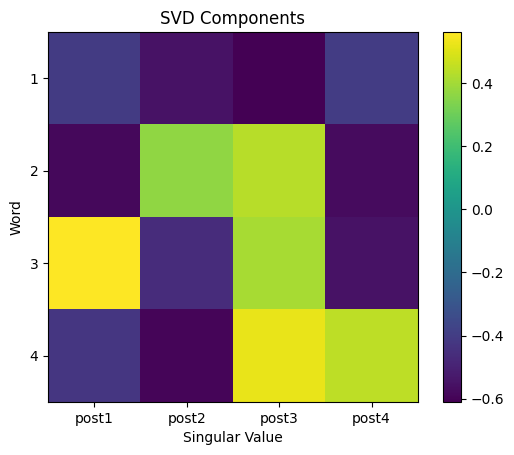

In [25]:
plt.imshow(V, interpolation='none')
plt.xticks(range(len(n_names)))
plt.yticks(range(len(words)))
plt.ylim(len(words)-1.5, -.5)
ax = plt.gca()
ax.set_xticklabels(n_names)
ax.set_yticklabels(range(1, len(words)+1))
plt.title('SVD Components')
plt.xlabel('Singular Value')
plt.ylabel('Word')
plt.colorbar()
plt.show()

### **Let's Ckeck which Words Have Similar Values**

In [28]:
pd.DataFrame(U[:,1] , index=words)

,0
ice,0.001447
snow,-0.651258
tahoe,-0.501568
ghost,0.411023
puck,0.394145
